In [271]:
import numpy as np
from UAV import *
import random
from sklearn.manifold import MDS
import matplotlib.pyplot as plt           # for plotting

Definition of the Distance Matrix

In [272]:
n_robots = int(input("number of robots: "))
platoon = []

# initialization of n robots
for i in range(n_robots):
    if i==0:
        i_robot = Robot("op_" + str(i),0,0,0)
    else:
        i_robot = Robot("op_" + str(i),random.uniform(0, 10.0),random.uniform(0, 10.0),0)
    platoon.append(i_robot)

coordinates = [[],[],[]]
S = []
for rob in platoon:
    coordinates = np.append(coordinates,rob.get_coords(),axis=1)

for i in range(len(coordinates[1])):
    S.append([coordinates[0,i], coordinates[1,i]])
S = np.array(S)

DM = d_matrix(platoon)
print(DM)

[[ 0.          9.59224668  9.42315379]
 [ 9.59224668  0.         10.02921043]
 [ 9.42315379 10.02921043  0.        ]]


Identity matrix

In [273]:
I   = np.eye(n_robots)
print(I)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Definition of the e vector and the H matrix

In [274]:
e   = np.array([[1] for i in range(n_robots)])

H = I - (e*e.T)/n_robots
print(H)

[[ 0.66666667 -0.33333333 -0.33333333]
 [-0.33333333  0.66666667 -0.33333333]
 [-0.33333333 -0.33333333  0.66666667]]


Eigendecomposition of the matrix -1/2*H*D*H

In [275]:
print(-1/2*H*DM*H,'\n')

#Eigenvalues ev, eigenvectors EV
ev,EV = np.linalg.eig(-1/2*H*DM*H)

#Lambda is the diagonal matrix whose elements are the eigenvalues
LAMBDA = np.eye(n_robots)*ev

#U is the matrix whose columns are the eigenvectors
U      = np.transpose(EV)
print(LAMBDA,'\n\n',U)

#Sstar  = np.sqrt(LAMBDA).transpose(U)
#print(Sstar)

[[-0.         -0.53290259 -0.52350854]
 [-0.53290259 -0.         -0.55717836]
 [-0.52350854 -0.55717836 -0.        ]] 

[[-1.07585212  0.          0.        ]
 [-0.          0.51790705  0.        ]
 [-0.          0.          0.55794507]] 

 [[-0.57034004 -0.58246179 -0.57918089]
 [-0.81341381  0.30235445  0.49693033]
 [ 0.11432501 -0.754533    0.64622731]]


Scikit learn MDS approach

In [276]:
n_components = 2                                   # p, reduced dimensionality space
embedding = MDS(n_components=2,n_init = 20,max_iter = 1000,random_state = 73073,dissimilarity='precomputed') # instantiate and set the hyperparameter
MDS_transformed = embedding.fit_transform(DM)
MDS_transformed.shape
print(MDS_transformed)
print(S)

[[-4.537502    2.91195107]
 [ 5.04756944  2.71241009]
 [-0.51006744 -5.62436116]]
[[0.         0.        ]
 [0.6258169  9.57181015]
 [8.69935032 3.62175805]]


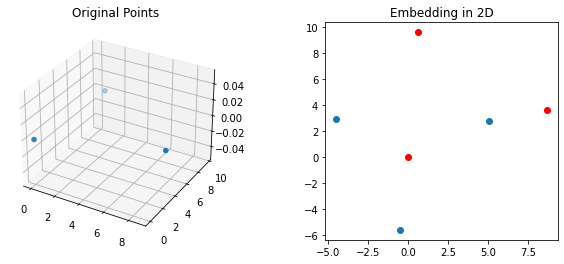

In [277]:
fig = plt.figure(2, (10,4))
ax = fig.add_subplot(121, projection='3d')
ax.scatter3D(coordinates[0,:], coordinates[1,:], coordinates[2,:])
plt.title('Original Points')

ax = fig.add_subplot(122)
plt.scatter(MDS_transformed[:,0], MDS_transformed[:,1])
plt.scatter(S[:,0], S[:,1], color='red')
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()

Introduction of the controlled displacement

In [278]:
deltaX = deltaY = 0.1

deltaSprime = np.array([[0,0] for i in range(n_robots)],dtype=float)
deltaSprime[0] = [deltaX,deltaY]
print(deltaSprime)

Sprime = S + deltaSprime
print(Sprime)

[[0.1 0.1]
 [0.  0. ]
 [0.  0. ]]
[[0.1        0.1       ]
 [0.6258169  9.57181015]
 [8.69935032 3.62175805]]


Phi prime definition

In [279]:
Phiprime = np.array([np.diag(Sprime@np.transpose(Sprime))]).T
print(Phiprime)

DMprime = Phiprime@e.T - 2*Sprime@Sprime.T + e@Phiprime.T
print(DMprime)

[[2.00000000e-02]
 [9.20111963e+01]
 [8.87958274e+01]]
[[  0.          89.99167091  86.35160568]
 [ 89.99167091   0.         100.5850619 ]
 [ 86.35160568 100.5850619    0.        ]]


DMprime breakdown analysis (as on the paper)

In [280]:
piece1 = DM - DMprime
print(piece1)

piece2 = (np.ones(n_robots)-np.eye(n_robots))*(0.1**2*2)
print(piece2)

piece3 = -2*((S@deltaSprime.T).T + S@deltaSprime.T)
print(piece3)

print(piece1+piece2+piece3)

[[  0.         -80.39942423 -76.92845189]
 [-80.39942423   0.         -90.55585147]
 [-76.92845189 -90.55585147   0.        ]]
[[0.   0.02 0.02]
 [0.02 0.   0.02]
 [0.02 0.02 0.  ]]
[[-0.         -2.03952541 -2.46422167]
 [-2.03952541 -0.         -0.        ]
 [-2.46422167 -0.         -0.        ]]
[[  0.         -82.41894964 -79.37267356]
 [-82.41894964   0.         -90.53585147]
 [-79.37267356 -90.53585147   0.        ]]


Theta: -2.955760
[[-0.98278266  0.18476536]
 [-0.18476536 -0.98278266]]
[[-1  0]
 [ 0  1]]
[[ 4.99740598 -2.02344183]
 [-4.4595043  -3.5983256 ]
 [-0.53790169  5.62176743]]
[[-4.537502    2.91195107]
 [ 5.04756944  2.71241009]
 [-0.51006744 -5.62436116]]


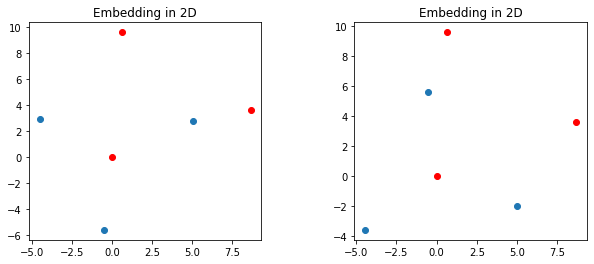

In [281]:
a2 = DM[0,1] - DMprime[0,1] + deltaX**2 + deltaY**2
b2 = -2*(S[1,0]*deltaX + S[1,1]*deltaY)
c2 = 2*(S[1,0]*deltaY - S[1,1]*deltaX)

a3 = DM[0,2] - DMprime[0,2] + deltaX**2 + deltaY**2
b3 = -2*(S[2,0]*deltaX + S[2,1]*deltaY)
c3 = 2*(S[2,0]*deltaY - S[2,1]*deltaX)

sinTheta = (a3*b2-a2*b3)/(b3*c2-b2*c3)
cosTheta = (a2*c3-a3*c2)/(b3*c2-b2*c3)

theta = np.arctan2(sinTheta,cosTheta)
print('Theta: %f' % (theta))
rotMatrix = np.array([[np.cos(theta),np.sin(theta)],[-np.sin(theta),np.cos(theta)]]).T
F = np.array([[-1,0],[0,1]])
print(rotMatrix)
print(F)

S_real = (rotMatrix@MDS_transformed.T).T
print(S_real)
print(MDS_transformed)

fig = plt.figure(3, (10,4))
ax = fig.add_subplot(121)
plt.scatter(MDS_transformed[:,0], MDS_transformed[:,1])
plt.scatter(S[:,0], S[:,1], color='red')
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)

ax = fig.add_subplot(122)
plt.scatter(S_real[:,0], S_real[:,1])
plt.scatter(S[:,0], S[:,1], color='red')
plt.title('Embedding in 2D')
fig.subplots_adjust(wspace=.4, hspace=0.5)
plt.show()


In [282]:
print(S_real)
print(S)

[[ 4.99740598 -2.02344183]
 [-4.4595043  -3.5983256 ]
 [-0.53790169  5.62176743]]
[[0.         0.        ]
 [0.6258169  9.57181015]
 [8.69935032 3.62175805]]
